In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [115]:
data = pd.read_csv("2015_Street_Tree_Census_-_Tree_Data.csv")

In [116]:
# Trees that are dead or stumped have NAN health values
print(data['health'].value_counts(dropna=False))
print(data['status'].value_counts())

# Our goal is to predict alive tree's health level
# drop rows with health is NAN
data = data[data['health'].notna()]

Good    528850
Fair     96504
NaN      31616
Poor     26818
Name: health, dtype: int64
Alive    652173
Stump     17654
Dead      13961
Name: status, dtype: int64


In [117]:
# drop unnecessary columns by description (missing or meaningless)
data = data.drop(columns=['tree_id','block_id','created_at','council district','census tract','bin','bbl'])

# drop redundant location features 
data = data.drop(columns=['postcode','state','boro_ct','x_sp', 'y_sp'])
# drop boroname and nta (same as nta_name)
data = data.drop(columns=['borough','nta_name'])
# drop redundant string data
data = data.drop(columns=['problems','address','spc_latin'])

# show only stumped tree has positive stump_diam, all other trees are 0
# Decision: delete column stump_diam
print("Num of trees that have positive stump_diam value: ",data.shape[0]-data['stump_diam'].value_counts()[0])

# drop features related to stump and dead trees
data = data.drop(columns=['stump_diam','status'])

cols = data.columns
print(cols)
print(data.shape)

Num of trees that have positive stump_diam value:  0
Index(['tree_dbh', 'curb_loc', 'health', 'spc_common', 'steward', 'guards',
       'sidewalk', 'user_type', 'root_stone', 'root_grate', 'root_other',
       'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe',
       'brch_other', 'zip_city', 'community board', 'borocode', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'latitude', 'longitude'],
      dtype='object')
(652172, 26)


In [118]:
# missing value analysis
print(data.isna().sum())
# drop the rows that contain at least one NA
data = data.dropna()

tree_dbh           0
curb_loc           0
health             0
spc_common         5
steward            0
guards             1
sidewalk           1
user_type          0
root_stone         0
root_grate         0
root_other         0
trunk_wire         0
trnk_light         0
trnk_other         0
brch_light         0
brch_shoe          0
brch_other         0
zip_city           0
community board    0
borocode           0
cncldist           0
st_assem           0
st_senate          0
nta                0
latitude           0
longitude          0
dtype: int64


In [119]:
num_cols = list(data._get_numeric_data().columns)
print(num_cols)
cat_cols = list(set(cols) - set(num_cols))
print(cat_cols)

['tree_dbh', 'community board', 'borocode', 'cncldist', 'st_assem', 'st_senate', 'latitude', 'longitude']
['spc_common', 'trunk_wire', 'zip_city', 'trnk_light', 'root_other', 'brch_shoe', 'nta', 'brch_other', 'curb_loc', 'user_type', 'trnk_other', 'health', 'sidewalk', 'steward', 'root_stone', 'root_grate', 'guards', 'brch_light']


In [120]:
# handle the categorical columns
# use ordinal encoder to handle 'health', 'steward', 'guards', 'sidewalk', 'curb_loc'
health = ['Poor','Fair','Good']
enc = OrdinalEncoder(categories=[health])
data[['health_enc']] = enc.fit_transform(data[['health']])

steward = ['None', '1or2', '3or4', '4orMore']
enc = OrdinalEncoder(categories=[steward])
data[['steward']] = enc.fit_transform(data[['steward']])

sidewalk = ['NoDamage', 'Damage']
enc = OrdinalEncoder(categories=[sidewalk])
data[['sidwalk']] = enc.fit_transform(data[['sidewalk']])

curbloc = ['OnCurb', 'OffsetFromCurb']
enc = OrdinalEncoder(categories=[curbloc])
data[['curb_loc']] = enc.fit_transform(data[['curb_loc']])

# use one hot encoder to handle 'user_type', 'guards'
enc = OneHotEncoder(drop='first')
user_type = enc.fit_transform(data[['user_type']])
data[enc.categories_[0][1:]] = user_type.toarray()

guards = enc.fit_transform(data[['guards']])
data[enc.categories_[0][1:]] = guards.toarray()

data.drop(['user_type','guards'], axis=1, inplace=True)

# TODO: 'spc_common', 'nta_name'

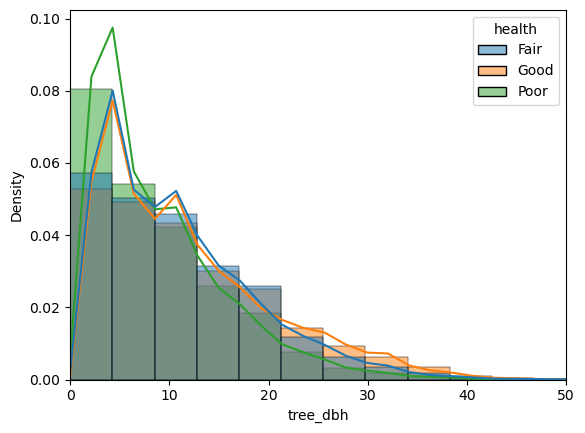

In [143]:
# sns.histplot(data,x='tree_dbh', hue='health', bins = 100, stat="density", common_norm=False,kde=True)
# plt.xlim(0,50)
# plt.show()

/Users/yuanchenwei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yuanchenwei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yuanchenwei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

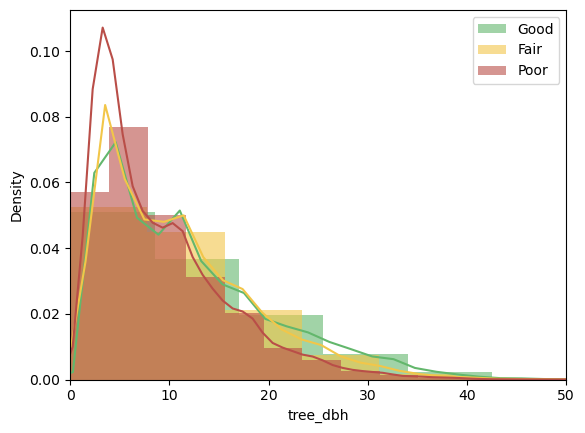

In [141]:
x1 = data.loc[data.health=='Good', 'tree_dbh']
x2 = data.loc[data.health=='Fair', 'tree_dbh']
x3 = data.loc[data.health=='Poor', 'tree_dbh']

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':1.5})

sns.distplot(x1, color="#63B76C", label="Good", **kwargs)
sns.distplot(x2, color="#F2C649", label="Fair", **kwargs)
sns.distplot(x3, color="#B94E48", label="Poor", **kwargs)
plt.xlim(0,50)
plt.legend()
plt.show()

outliers, 